In [1]:
import nibabel as nb
import numpy as np
from glob import glob
import os
import pandas as pd
from nilearn import plotting
from nilearn.glm.second_level import SecondLevelModel
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img
import seaborn as sns
import pingouin as pg

/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
roi = 'ba-17-18_contr-objscrvsbas_top-500'
timecoursefiles = sorted(glob('/project/3018040.05/rotscenetask_fmri/analysis/infocoupling/FIR_timecourses/*'))
timecoursefiles = [f for f in timecoursefiles if roi in f]
all_timecourses = []
for tc in timecoursefiles:
    all_timecourses.append(pd.read_csv(tc))
all_timecourses = pd.concat(all_timecourses)

In [3]:
all_timecourses.head()

,correct,output,rawdistance,distance,runno,delay,split,view,expected,subject,roi,approach,traintask,testtask,trainmodel,testmodel
0,1,1,-2.410904,1.383210,1,0,1.0,1,True,sub-001,ba-17-18_contr-objscrvsbas_top-500,traintest,train,test,5,15
1,0,1,-0.061459,-0.166537,1,0,1.0,1,True,sub-001,ba-17-18_contr-objscrvsbas_top-500,traintest,train,test,5,15
2,0,0,0.210076,0.025921,2,0,1.0,1,True,sub-001,ba-17-18_contr-objscrvsbas_top-500,traintest,train,test,5,15
3,1,0,2.307024,1.059995,2,0,1.0,1,True,sub-001,ba-17-18_contr-objscrvsbas_top-500,traintest,train,test,5,15
4,1,1,-0.704077,0.499320,3,0,1.0,1,True,sub-001,ba-17-18_contr-objscrvsbas_top-500,traintest,train,test,5,15


In [4]:
len(timecoursefiles)

35

In [91]:
all_timecourses.roi.unique()

array(['ba-17-18_contr-objscrvsbas_top-500'], dtype=object)

In [92]:
all_timecourses = all_timecourses.groupby(['subject', 'expected', 'delay', 'roi']).mean().reset_index()

In [93]:
all_timecourses[all_timecourses.delay==2].groupby(['expected']).mean()

,delay,correct,output,rawdistance,distance,runno,split,view,trainmodel,testmodel
expected,,,,,,,,,,
False,2.0,0.613265,0.496939,-0.016998,0.269108,4.0,NaN,1.5,5.0,15.0
True,2.0,0.654422,0.502041,-0.017002,0.346656,4.0,2.0,1.5,5.0,15.0


In [94]:
pg.ttest(all_timecourses[(all_timecourses.delay==1)&(all_timecourses.expected==True)].distance,
         all_timecourses[(all_timecourses.delay==1)&(all_timecourses.expected==False)].distance,
         paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.710901,34,two-sided,0.481994,"[-0.05, 0.11]",0.162007,0.229,0.153799


In [95]:
all_timecourses.delay.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [96]:
all_timecourses.testmodel.unique()

array([15.])

In [97]:
all_timecourses.roi.unique()

array(['ba-17-18_contr-objscrvsbas_top-500'], dtype=object)

<AxesSubplot:xlabel='delay', ylabel='distance'>

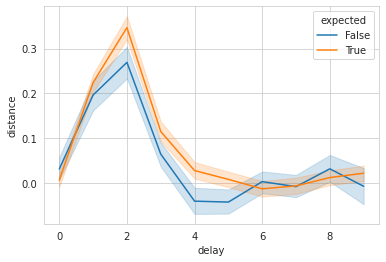

In [98]:
sns.set_style('whitegrid')
sns.lineplot(x='delay', y='distance', hue='expected', 
             data=all_timecourses, ci=68)

<AxesSubplot:xlabel='delay', ylabel='distance'>

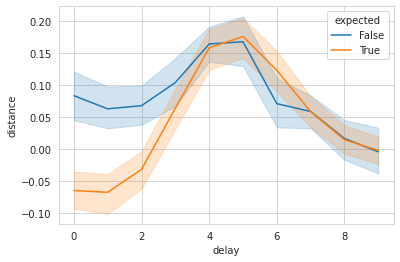

In [30]:
sns.set_style('whitegrid')
sns.lineplot(x='delay', y='distance', hue='expected', 
             data=all_timecourses[all_timecourses['roi']=='ba-17-18_R_contr-objscrvsbas_top-500'])

# Contrast

In [10]:
roi = 'ba-17-18_contr-objscrvsbas_top-500'

In [20]:
s = 'sub-001'
glob(f'/project/3018040.05/info_coupling/contrasts/{roi}_{s}/con_*.nii')

['/project/3018040.05/info_coupling/contrasts/ba-17-18_contr-objscrvsbas_top-500_sub-001/con_0001.nii',
 '/project/3018040.05/info_coupling/contrasts/ba-17-18_contr-objscrvsbas_top-500_sub-001/con_0002.nii',
 '/project/3018040.05/info_coupling/contrasts/ba-17-18_contr-objscrvsbas_top-500_sub-001/con_0003.nii',
 '/project/3018040.05/info_coupling/contrasts/ba-17-18_contr-objscrvsbas_top-500_sub-001/con_0004.nii',
 '/project/3018040.05/info_coupling/contrasts/ba-17-18_contr-objscrvsbas_top-500_sub-001/con_0005.nii']

In [31]:
allfiles = [f'/project/3018040.05/info_coupling/contrasts/{roi}_{s}/con_0003.nii' for s in [f'sub-{i:03d}' for i in range(1, 36)]]
n_samples = len(allfiles)
print('N. samples:', n_samples)

N. samples: 35


In [32]:
design_matrix = pd.DataFrame([1] * n_samples, columns=["intercept"])

In [33]:
second_level_model = SecondLevelModel().fit(
    allfiles, design_matrix=design_matrix
)

In [34]:
z_map = second_level_model.compute_contrast(output_type="z_score")

In [35]:
threshold_img(
    z_map,
    threshold=3.29
)

In [36]:
thresholded_map1, threshold1 = threshold_stats_img(
    z_map,
    alpha=0.001,
    height_control="fpr",
    cluster_threshold=0,
    two_sided=True,
)

In [37]:
threshold1

3.2905267314918945

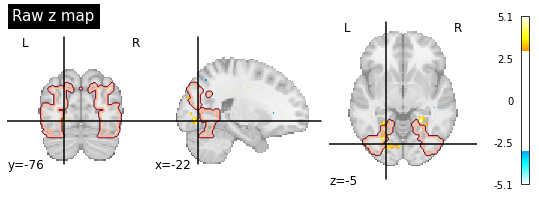

In [41]:
display = plotting.plot_stat_map(z_map, title="Raw z map",threshold=3)
display.add_contours('/project/3018040.05/anat_roi_masks/ba-19.nii')

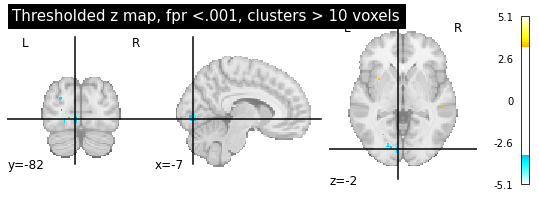

In [15]:
plotting.plot_stat_map(
    thresholded_map1,
    cut_coords=display.cut_coords,
    threshold=threshold1,
    title="Thresholded z map, fpr <.001, clusters > 10 voxels",
)